<!-- use python 3.11.1 -->
<!-- model acuracy is 55.82%. Can be increase with good gpu -->

In [1]:
%pip install tensorflow keras pandas numpy jupyter notebook tqdm opencv-contrib-python scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install keras_preprocessing

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [4]:
Train_Dir = 'images/train'
Test_Dir = 'images/test'

In [5]:
def createDataFrame(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label,"complete")
    return image_paths, labels

In [6]:
train = pd.DataFrame()
train['image'],train['label'] = createDataFrame(Train_Dir)

angry complete
disgust complete
fear complete
happy complete
neutral complete
sad complete
surprise complete


In [7]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [8]:
test = pd.DataFrame()
test['image'],test['label'] = createDataFrame(Test_Dir)

angry complete
disgust complete
fear complete
happy complete
neutral complete
sad complete
surprise complete


In [9]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [10]:
from tqdm.notebook import tqdm
%pip install Pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [12]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [13]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [14]:
x_train = train_features / 255.0
x_test = test_features / 255.0


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [17]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [18]:
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)

In [19]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 167s 725ms/step - accuracy: 0.2465 - loss: 1.8347 - val_accuracy: 0.2583 - val_loss: 1.8129
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 159s 701ms/step - accuracy: 0.2485 - loss: 1.8157 - val_accuracy: 0.2627 - val_loss: 1.7937
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 148s 657ms/step - accuracy: 0.2628 - loss: 1.7832 - val_accuracy: 0.3174 - val_loss: 1.6866
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 149s 660ms/step - accuracy: 0.3152 - loss: 1.6899 - val_accuracy: 0.4182 - val_loss: 1.5524
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 146s 645ms/step - accuracy: 0.3791 - loss: 1.5763 - val_accuracy: 0.4416 - val_loss: 1.4442
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 147s 650ms/step - accuracy: 0.4157 - loss: 1.5028 - val_accuracy: 0.4762 - val_loss: 1.3666
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 148s 654ms/step - accuracy: 0.4410 - loss: 1.4427 - val_accuracy: 0.5006 - val_loss: 1.3032
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 151s 668ms/step - accuracy: 

KeyboardInterrupt: 

In [22]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [23]:
from keras.models import model_from_json

In [24]:
json_file = open('emotiondetector.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [25]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [36]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [42]:
image = 'images/train/fear/110.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
model prediction is  fear


In [44]:
%pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 8.1/8.1 MB 188.2 kB/s eta 0:00:00
     ------------------------------------ 222.0/222.0 kB 295.0 kB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 232.1 kB/s eta 0:00:00
     -------------------------------------- 72.0/72.0 kB 246.9 kB/s eta 0:00:00
     ------------------------------------ 111.1/111.1 kB 293.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
model prediction is  sad


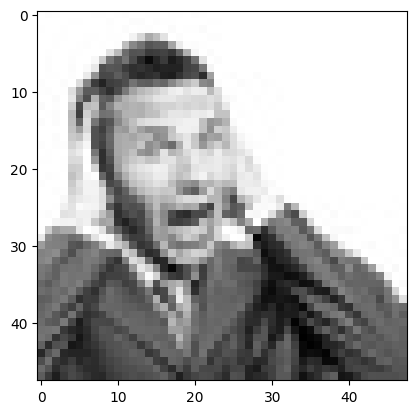

In [48]:
image = 'images/train/fear/17.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')